In [3]:
import numpy as np
import pylab as pl
%matplotlib inline

/home/julien/kaggle/venv/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [87]:
smooth = 1.
def dice_coef(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection + smooth) / (np.sum(y_true) + np.sum(y_pred) + smooth)

def binary_cross_entropy(y_true, y_pred):
    # Ensure y_pred lies strictly between 0 and 1 to avoid log(0)
    y_pred = np.clip(y_pred, 1e-5, 1 - 1e-5)
    return np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [93]:
# The bend of the blue line below depends on N
N = 600
y_true = np.zeros(N)
y_true[np.random.randint(N, size=50)] = 1

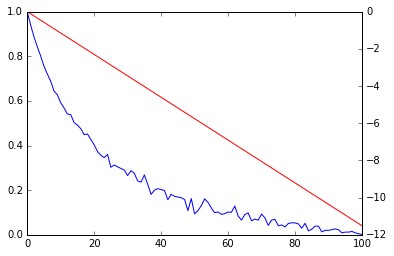

In [94]:
err_percent = np.arange(101)

dice_coefs = []
binary_ces = []
for pct in err_percent:
    nerrors = int(pct * N / 100.0)
    y_pred = y_true.copy()
    wrong = np.random.choice(N, size=nerrors, replace=False)
    y_pred[wrong] = (y_true[wrong] + 1) % 2
    
    dice_coefs.append(dice_coef(y_true, y_pred))
    binary_ces.append(binary_cross_entropy(y_true, y_pred))
    
dice_coefs = np.array(dice_coefs)

pl.plot(err_percent, dice_coefs)
ax = pl.twinx()
ax.plot(err_percent, binary_ces, c='r')